# Hydrogen

use modules in ~\Python\spectra\src\
<br>
ref.: https://github.com/kouui/spectra
<br>

2020.5.7     K.Ichimoto   
2020.5.16    k.i., kou　　numerical  
2020.5.22    k.i.　update numerical integ., etc.  
2020.5.29    k.i.　add bb & bf cross sections 

In [31]:
#---------------------------------------------------------------------
# setup Python environments
# 2020.4.24    k.i.
#---------------------------------------------------------------------
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt   # module for plotting
plt.style.use("ggplot")
import numpy as np                # module for vectorized numeric calculation
import sys
sys.path.append("../")
from src import Constants as Cst

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Energy levels of hydrogen (-like ion)
# $E_n= -\frac{Z^2}{n^2} R_y$  
$\qquad R_y=2.1799\times10^{-11} $ [erg] ;   Rydberg constant  
$\qquad n$  ; principle quantum number  
$\qquad Z$  ; nuclear charge

# Line series

# $\frac{h c}{\lambda}=h\nu=E_{n_u}-E_{n_l}=\left(\frac{1}{n_l^2}-\frac{1}{n_u^2}\right)Z^2 R_y$

In [10]:
# Energy level
Ry = Cst.E_Rydberg_
Z = 1
ns = np.array([1,2,3,4,5,6,7,8,9])   # principle numbers
print(' n      En [erg]    ExPot.[eV]')
print("oo  {0:12.3e}  {1:10.4f}".format(0, Ry/Cst.eV2erg_))
for n in ns[::-1]:
    En = -Z**2/n**2 *Ry
    print("{0:2d}  {1:12.3e}  {2:10.4f}".format(n,En,(En + Ry)/Cst.eV2erg_))


 n      En [erg]    ExPot.[eV]
oo     0.000e+00     13.6057
 9    -2.691e-13     13.4377
 8    -3.406e-13     13.3931
 7    -4.449e-13     13.3280
 6    -6.055e-13     13.2278
 5    -8.719e-13     13.0615
 4    -1.362e-12     12.7553
 3    -2.422e-12     12.0940
 2    -5.450e-12     10.2043
 1    -2.180e-11      0.0000


''

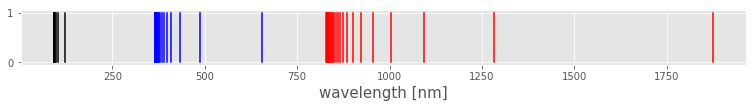

In [12]:
# line series
nls=np.array([1,2,3])#,4,5,6,7])   # n of lower levels -> Lyman, Balmer, Paschen,
cols=['black','blue','red','green','orange','purple','gray']
%matplotlib inline
fig, ax = plt.subplots(1,1, figsize=(13,1)) #, dpi=150)
for nl in nls:
    for nu in range(nl+1,30):
        wl = Cst.h_*Cst.c_/( (1/nl**2 - 1/nu**2) * Z**2 * Ry ) *1e7  # [nm]
        #print(nl,nu,wl)
        ax.plot([wl,wl],[0,1],color=cols[nl-1])
ax.set_xlabel("wavelength [nm]",fontsize=15)
;

''

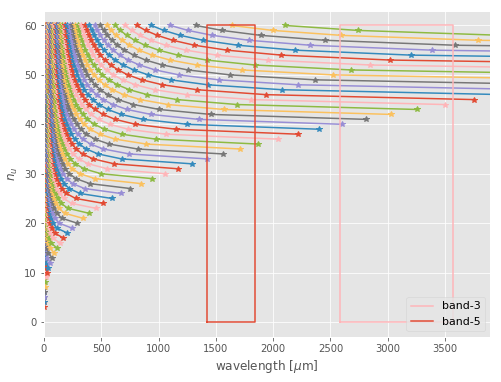

In [13]:
# higher seriese of Hydrogen lines for searching ALMA observable
#  from hline.pro,  2020.4.30 k.i.

#%matplotlib notebook

R=109677.576    # cm^-1 Rydberg const.(Herzberg)
R=109737.315    # <== Rika nenpyou
R=109708.3      # <== fit to Solar data
numax = 60      # max n of upper level
nlmax = 55      # max n of lower level

wl = np.zeros(numax)
nus = np.linspace(1,numax,numax)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1 )
for nl in range(1,nlmax+1):    # nl =   1-Lyman,  2-Balmer,  3-Paschen,  4-Blackett
    for nu in range(nl+1,numax): 
        wl[nu]=1./(R*(1./nl**2 - 1./nu**2))*1.e4  # wl in micron
        #print(nl,nu,wl[nu],Cst.c_/wl[nu]*1.e7)
    ax.plot(wl[nl+1:],nus[nl+1:],"-*")
wlmax = 1./(R*(1./nlmax**2 - 1./(nlmax+1)**2))*1.e4  # wl in micron

ax.set_xlabel("wavelength [$\mu$m]")
ax.set_ylabel("$n_u$")
#ax.set_xscale("log")
ax.set_xlim(0,wlmax/2)

#------ ALMA bands ------
# https://www.almaobservatory.org/en/about-alma-at-first-glance/how-alma-works/technologies/receivers/
alma_f = { # band: GHz 
    1:  [35,  50],
    2:  [65,  90],
    3:  [84, 116],
    4: [125, 163], 
    5: [163, 211],
    6: [211, 275],
    7: [275, 373],
    8: [385, 500],
    9: [602, 720],
    10:[787, 950]
}
bnds = alma_f.keys()
for b in [3,5]:  # <== ALMA available bands
    alma_wl = Cst.c_/np.array(alma_f[b])/1e9 *1e4  # wavelength in micron
    al1 = alma_wl[1] 
    al2 = alma_wl[0]
    #print(al1,al2)
    xx = [al1,al2,al2,al1,al1] ; yy = [0,0,numax,numax,0]
    ax.plot(xx,yy,'-',label="band-{0:1d}".format(b))
ax.legend(bbox_to_anchor=(1, 0),loc='lower right',fontsize=11,ncol=1)
;

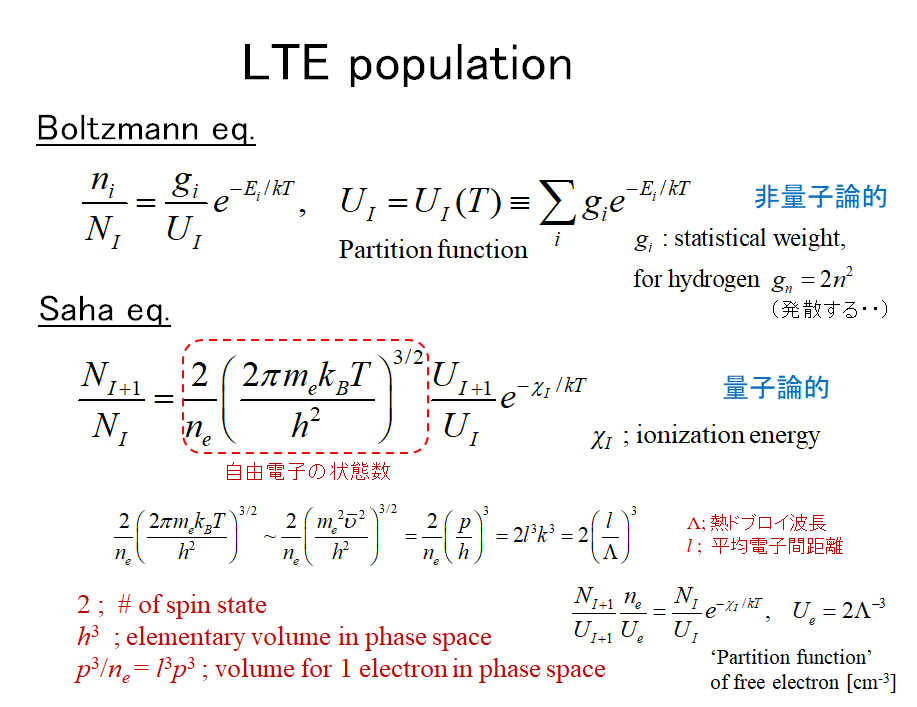

## Negaive hydrogen
HI  :  ionization energy = 13.6 eV ~  91.2 nm  
H$^-$  :  binding energy  =  0.754 eV ~ 1650 nm
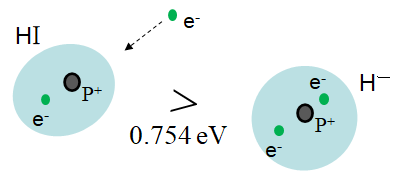
$\qquad \qquad$    Wildt 1939 ApJ, ‘electron affinity’

''

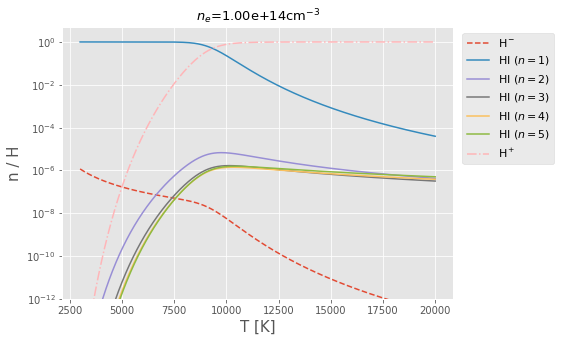

In [16]:
#--------------------------------------------------------------------------
# hydrogen population in LTE, calc. Saha-Boltzmann in constant n_e
#--------------------------------------------------------------------------
from src.Atomic import LTELib
chi_Hm = 0.754 *Cst.eV2erg_    # binding energy of negative hydrogen [erg]
E0 = -Cst.E_Rydberg_           # ionization energy of neutral hydrogen [erg]
n_e = 1.e14                    # [cm-3],  10^14 in lower photosphere
ns = np.array([1,2,3,4,5])     # principle quantum numbers
nn = len(ns)  # # of level n
ep = E0 *(1/ns**2 - 1)         # excitation potential [erg]
nT = 1301
T = np.linspace(3000, 20000, nT)     # temperature in K,  
n_HI = 1.

kT = Cst.k_ * T

u_HI = LTELib.Ufunc('H_I',T)      # partition func.
u_HII = LTELib.Ufunc('H_II',T)
r = Cst.saha_ * T**(1.5) * (u_HI/1) * np.exp(-chi_Hm/kT) / n_e
n_Hm = 1./r *n_HI
n_Hp = Cst.saha_ * T**(1.5) * (u_HII/u_HI) * np.exp(E0/kT) / n_e *n_HI
n_H = n_HI + n_Hm + n_Hp
pHm = n_Hm/n_H
pHp = n_Hp/n_H
pl = np.zeros([nT,nn])
for n in ns:
    gn = 2*n**2
    pl[:,n-1] = (gn/u_HI) * np.exp(-ep[n-1]/kT) *n_HI / n_H

fig, ax = plt.subplots(1,1, figsize=(7,5)) #, dpi=150)
ax.plot(T,pHm,label="H$^-$",ls="--")
for n in ns:
    ax.plot(T,pl[:,n-1],label="HI $(n={0:1d})$".format(n))
ax.plot(T,pHp,label="H$^+$",ls="-.")
ax.set_xlabel("T [K]",fontsize=15)
ax.set_yscale("log")
ax.set_ylabel("n / H",fontsize=15)
ax.set_ylim(1e-12,5)
#plt.title("$n_e$="+str(n_e[i])+"cm$^{-3}$",fontsize=13)
plt.title("$n_e$={0:5.2e}cm$^{{-3}}$".format(n_e),fontsize=13)
ax.legend(bbox_to_anchor=(1.01,1),fontsize=11,ncol=1)
;

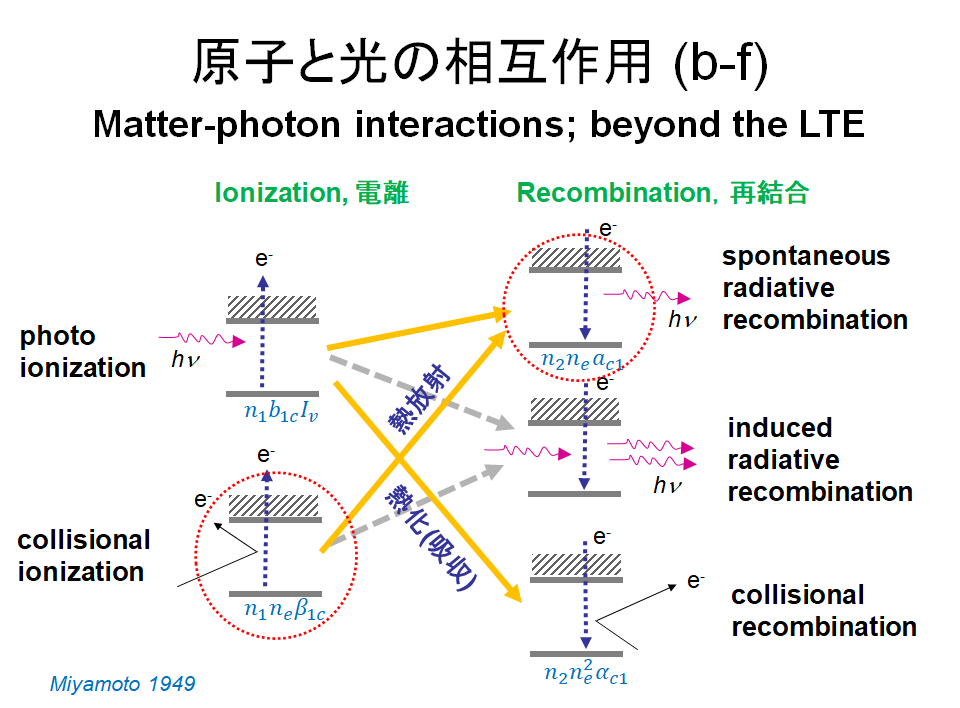

# 水素の電離度 (LTE vs. Coronal equiliblium);   

### Collisional ionization = radiative recombination

$$
\frac{n_c}{n_i} = \frac{3^{3/2} c^3 h^3 C_{nl} kT}{2^6 \pi^3 e^6 Z^4 \chi} e^{-\chi/{kT}} \frac{1}{E(\frac{\chi}{kT})} ; \quad C_{nl}=0.15, \quad E(x) = e^x \int_{x}^{\infty}{\frac{e^{-t}}{t}dt}
     \qquad \rm{(Miyamoto   1949)}
$$　　


In [17]:
#  module for calculating HII/HI in corona equil.

from scipy.integrate import quad

def integrand(t,x):
    return np.exp(x-t)/t

def E(x):
    return quad(integrand, x, np.inf, x)[0]

def nc_ni_Ratio(chi1,T1,Z):  #  n+/n
    nume = 3**1.5 * Cst.c_**3 * Cst.h_**3 * 0.15 * Cst.k_ * T1 
    denom = 2**6 * np.pi**3 * Cst.e_**6 * Z**4 * chi1
    x = chi1/(Cst.k_ * T1)
    r = nume/denom * np.exp(-x) / E(x)
    return r

''

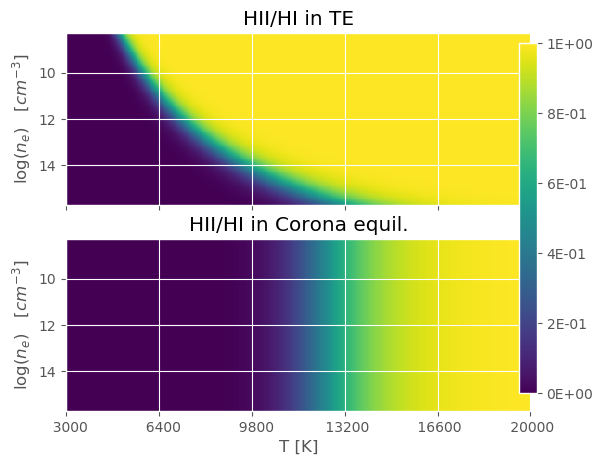

In [18]:
#--------------------------------------------------------------------------
# show ionization fraction of Hydrogen (HII/HI) as a function of T and ne on 2D space
#  use LTELib.Saha_distribution() for LTE
#  use the function nc_ni_Ratio() for Corona apporox. 
#--------------------------------------------------------------------------
# modified kouui 20200513 
#     changed row subplot to column subplot, added colorbar
#--------------------------------------------------------------------------
chi = 13.6 *Cst.eV2erg_
Tmin=3000. ;  Tmax=20000.
lnmin=7 ;  lnmax=17

T = np.linspace(Tmin, Tmax, 501)     # temperature in K
n_e = np.logspace(lnmin,lnmax,201)    # electron density, cm-3
nT = T.shape[0]
nn = len(n_e) # n_e.shape[0] also work
#---  LTE  ---
ri = np.zeros([nn,nT])
for i in range(nn):
        r = LTELib.Saha_distribution(1,1,chi,n_e[i],T)
        ri[i,:] = r/(1+r)
# --- Corona apporox. ---
#   << collisional ionization = radiative recombination >>
ric = np.zeros([nn,nT])
Z=1
for j in range(nT):
        r = nc_ni_Ratio(chi,T[j],Z)
        ric[:,j] = r/(1+r)

from src.Visual import Plotting
from matplotlib.colors import LogNorm
#fig = plt.figure(figsize=(10,20)) #, dpi=100)  

fig, axs = plt.subplots(2,1, figsize=(6,5), dpi=100, sharex=True)
        
#ax1 = fig.add_subplot(1,2,1 )
im0 = axs[0].imshow(ri)#, norm=LogNorm(vmin=1E-19, vmax=1)) #, extent=[1,10,1,8]) #,cmap="GnBu")# )
#plt.colorbar()
axs[0].set_title("HII/HI in TE")
#axs[0].set_xlabel("T [K]")
#Plotting.set_imshow_ticks(axs[0], T, axis='x',points=5,fmt='%4d',rot=0)
axs[0].set_ylabel("log($n_e$)$ \quad [cm^{-3}$]")
Plotting.set_imshow_ticks(axs[0], np.log10(n_e), axis='y',points=5,fmt='%1.0f',rot=0)

#ax2 = fig.add_subplot(1,2,2)
im1 = axs[1].imshow(ric)#, norm=LogNorm(vmin=1E-19, vmax=1))#, extent=[0,500,0,400])  #,cmap="GnBu")#,extent=[3,5,7,17] )
#plt.colorbar()
axs[1].set_title("HII/HI in Corona equil.")
axs[1].set_xlabel("T [K]")
Plotting.set_imshow_ticks(axs[1], T, axis='x',points=6, fmt='%6d',rot=0)
axs[1].set_ylabel("log($n_e$)$ \quad [cm^{-3}$]")
Plotting.set_imshow_ticks(axs[1], np.log10(n_e),axis='y',points=5,fmt='%1.0f',rot=0)

axcolor = fig.add_axes([0.88, 0.16, 0.03, 0.7])
fig.colorbar(im0, cax=axcolor, format='%.0E')
;

# 水素原子の固有関数


# $\quad \psi_{nlm}(r,\theta,\phi) = R_{nl}(r) Y_{lm}(\theta,\phi) $

$\qquad \qquad n = 1, 2, 3,,,,   \qquad l = 0, 1,,,n-1   \qquad m = -l,, 0,, l$

$\qquad    R_{nl}(r) = \sqrt{\left(\frac{2Z}{n a_0}\right)^3
       \frac{(n-l-1)!}{2n(n+1)!}}e^{-\rho/2}
       \rho^l L^{2 l + 1}_{n - l - 1}\left(\rho\right) $

$\qquad  \quad  \rho = \frac{2r}{n a_0},  \qquad  a_0$  -  Bohr radius = $5.29 \times 10^{-9} $cm 

$\qquad \quad L^{2 l + 1}_{n - l - 1}(x)$ :
Generalized (associated) Laguerre polynomia defined as the solution of

$\qquad \quad x\frac{d^2}{dx^2}L_n^{(\alpha)}
  + (\alpha + 1 - x)\frac{d}{dx}L_n^{(\alpha)}
  + nL_n^{(\alpha)} = 0, $ 
  
$  \qquad \qquad $ where $\alpha > -1,  L_n^{(\alpha)}$ is a polynomial of degree $n$

$\qquad \quad \int{r^2 R_{nl}^2 dr}=1 $
  
$\qquad    Y_{lm}(\theta,\phi) = (-1)^m \sqrt{\frac{(2 l + 1)(l - m)!}{4 \pi (l + m)!}}
            P_{lm}(cos\theta)  e^{i m\phi}  $　

$\qquad \quad P_{lm}(\cos\theta)$:   associated Legendre function

In [19]:
# hydrogen wavefunction with sympy
from sympy import *
import sympy
from IPython.display import Math
init_printing()

# symbolic definition
a0 = Symbol('a_0', real=True)    #  Bohr radius
n,l,m = symbols('n l m', Int = True)
r, theta, phi = symbols('r theta phi', real=True)

# formulas
ro = 2*r/(n*a0)
Rnl = sqrt((2/n/a0)**3 * factorial(n-l-1)/(2*n*(factorial(n+l)))) \
    * exp(-ro/2) * ro**l *assoc_laguerre(n-l-1, 2*l+1, ro)
Tlm = (-1)**m * sqrt((2*l+1)*factorial(l-m)/(2*factorial(l+m))) \
    * assoc_legendre(l,m,cos(theta))
Pm = 1/sqrt(2*pi)*exp(I*m*phi)
Ylm = Tlm*Pm
psi = Rnl*Ylm

display(Math(r'R_{nl}(r) = %s' % sympy.latex(Rnl)))
display(Math(r'\Theta_{lm}(\theta) = %s' % sympy.latex(Tlm)))
display(Math(r'\Phi_{m}(\phi) = %s' % sympy.latex(Pm)))
display(Math(r'\Psi_{nlm}(r,\theta,\phi) = %s' % sympy.latex(psi)))
# for laTex output
# sympy.printing.print_latex(psi)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [20]:
#  examples of wavefunctions
#  confirm normalization, orthognality
nlm1='321' ;   n1 = int(nlm1[0]) ; l1=int(nlm1[1]) ;  m1=int(nlm1[2])
nlm2='210' ;   n2 = int(nlm2[0]) ; l2=int(nlm2[1]) ;  m2=int(nlm2[2])
psi1 = psi.subs([(n,n1),(l,l1),(m,m1),(a0,1)])
psi2 = psi.subs([(n,n2),(l,l2),(m,m2),(a0,1)])
psi1 = psi1.subs(-cos(theta)**2+1, sin(theta)**2)
psi2 = psi2.subs(-cos(theta)**2+1, sin(theta)**2)
#display(nlm1,psi1)
#display(nlm2,psi2)
display(Math(r'\psi_{%s} = %s' % (nlm1,sympy.latex(psi1)) ))
display(Math(r'\psi_{%s} = %s' % (nlm2,sympy.latex(psi2)) ))
i1 = integrate(psi1*conjugate(psi1) *r**2 *sin(theta),(phi,0,2*pi),(theta,0,pi), (r,0,oo))
i2 = integrate(psi2*conjugate(psi2) *r**2 *sin(theta),(phi,0,2*pi),(theta,0,pi), (r,0,oo))
i12 = integrate(psi1*conjugate(psi2) *r**2 *sin(theta),(phi,0,2*pi),(theta,0,pi), (r,0,oo))
print('<'+nlm1+'|'+nlm1+'> =',i1,',  <'+nlm2+'|'+nlm2+'> =',i2,',  <'+nlm1+'|'+nlm2+'> =',i12)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<321|321> = 1 ,  <210|210> = 1 ,  <321|210> = 0


## radial wavefunction,   $R_{nl}(r)$

In [21]:
#  module for numerical calculation of Rnl.
import numpy as np 
import scipy
from scipy.special import factorial as sci_factorial
from scipy.special import assoc_laguerre as sci_assoc_laguerre

def Rnl_N(n1,l1,a01,rr):
    ro1 = 2*rr/(n1*a01)
    RnlN = np.sqrt((2/n1/a01)**3 * sci_factorial(n1-l1-1)/(2*n1*(sci_factorial(n1+l1))))
    RnlN *= np.exp(-ro1/2) * ro1**l1 *sci_assoc_laguerre(ro1, n1-l1-1, k=2*l1+1)
    return RnlN


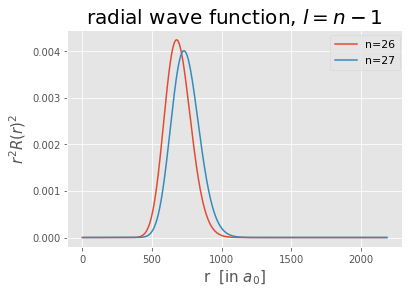

In [22]:
#  plot radial wavefunction, Rnl*r**2  
#   2020.5.11   ki    add Numeric
Numeric = 1  #  0 for symbol,  1 for numeric, 
lc = -1  #  0 for l=0, -1 for l=n-1
ns = np.array([1,2,3,4,5])
ns = np.array([26,27]) 
#ns = np.array([85,86])  # limitation of numerical calc.

rmax = np.max(ns)**2 *3    #  rmax in unit of a_0
a01 = 1.

nn = len(ns)  # # of level n
nr = int(rmax*2)+1
rr = np.linspace(0,rmax, nr)

RR = Rnl**2 *r**2
v = np.zeros(nr)
fig, ax = plt.subplots(1,1, figsize=(6,4)) #, dpi=150)
ax.set_xlabel("r  [in $a_0$]",fontsize=15)
#ax.set_yscale("log")
ax.set_ylabel("$r^2 R(r)^2$",fontsize=15)
#ax.set_ylim(1e-12,5)
for n1 in ns:
    if lc == 0:
        l1 = 0
        lcom="$l=0$"
    elif lc == -1:
        l1 = n1-1
        lcom="$l=n-1$"
    if Numeric == 0:
        R1 = RR.subs(([(n,n1),(l,l1),(a0,1)]))
        for i in range(0,nr):
            v[i] = N(R1.subs(r,rr[i]))
    else:
        v = Rnl_N(n1,l1,a01,rr)**2 *rr**2
        #print(n1,l1,a01)
    ax.plot(rr,v, label="n={0:1d}".format(n1)) #,label="H$^-$",ls="--")

plt.title("radial wave function, "+lcom,fontsize=20)
ax.legend(bbox_to_anchor=(1.01,1),fontsize=11,ncol=1)


In [91]:
#  n => imaginary  --> free electron state,  not work...

rr = np.linspace(0,200,100)
v = Rnl_N(1j,0,1,rr)   #  n=1j, l=0, a0=1
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(rr,v*rr)


TypeError: ufunc 'eval_genlaguerre' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [23]:
#  size of electron orbit w/ Sympy

RR = Rnl**2 *r**2
n1 = 3
ri = integrate(RR.subs([(n,n1),(l,n1-1)])*r,(r,0,oo)) 
#integrate(RR.subs([(l,n-1)])*r,(r,0,oo))

#ri #-Rational(3 ,2)
display(Math(sympy.latex(ri)))


<IPython.core.display.Math object>

# Einstein's coefficient

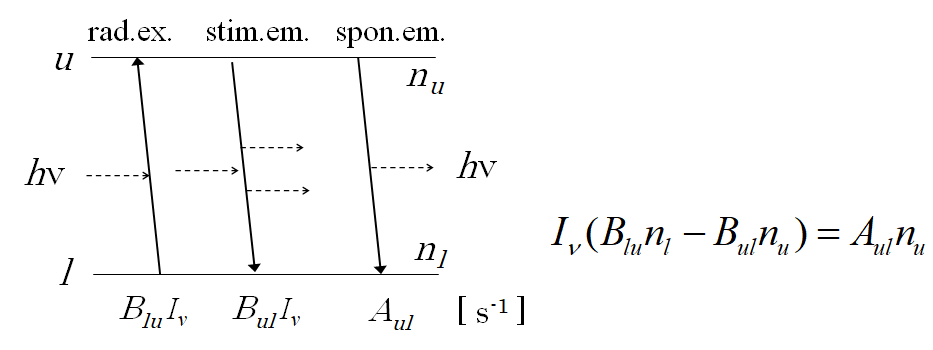

# Transition rate (diploe radiation)
#### ex. Hubeny and Mihalas 2014, “Theory of Stellar Atmospheres”

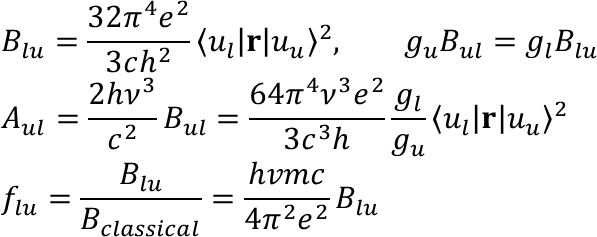

#### $f$: 'Oscillator strength' (ratio of cross section to the classical oscillator)


### Order estimate of $A_{ul}$
### $A_{ul} \sim \frac{32 \pi^{3} a_{0}^{2} e^{2} v^{3}}{3 c^{3} \hbar} \sim \frac{R_{y} \alpha^{3}}{\hbar}  \left(\frac{1}{n_{l}^{2}}- \frac{1}{n_{u}^{2}}\right)^{3},  \qquad \alpha = \frac{e^2}{\hbar c}　:  微細構造定数$

In [24]:
# order estimate of A
v, c, hb, e, a0 = symbols('v c hbar e a_0')
Ry, alp, nl, nu = symbols('R_y alpha n_l n_u')
nl1 = 2 ;  nu1 = 3   # H-alpha
v1 = Cst.E_Rydberg_*(1/nl1**2 - 1/nu1**2)/Cst.h_
A = 32* pi**3* v**3 *e**2 /3 /c**3 /hb *(a0)**2
B = alp**3 * Ry/3/hb *(1/nl**2 - 1/nu**2)**3
A1 = A.subs(([(n,2),(v,v1),(e,Cst.e_),(c,Cst.c_),(hb,Cst.h_/2/pi),(a0,Cst.a0_)]))
B1 = B.subs(([(Ry,Cst.E_Rydberg_),(alp,Cst.alp_),(hb,Cst.h_/2/pi),(nl,nl1),(nu,nu1)]))
display(Math(r'A_{ul} \sim %s = %s \sim %7.3e s^{-1}' % (sympy.latex(A),sympy.latex(B),N(A1)) ))

#sympy.printing.print_latex(A) ; sympy.printing.print_latex(B)

<IPython.core.display.Math object>

Coupling of the upper and lower states in dipole appoloximation is obtained by the following integration.
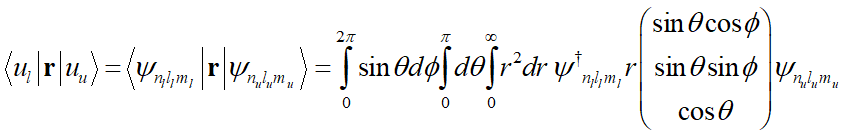

or
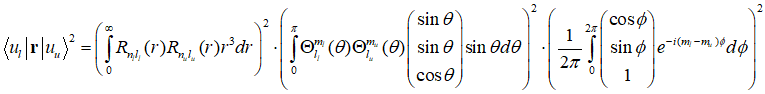

In [25]:
#  module for numerical calculation of Rnl & Ylm,   2020.5.17 k.i.
import numpy as np 
import scipy
from scipy.special import factorial as sci_factorial
from scipy.special import assoc_laguerre as sci_assoc_laguerre
from scipy.special import lpmv as sci_assoc_legendre

def Rnl_N(n1,l1,a01,rr):
    ro1 = 2*rr/(n1*a01)
    RnlN = np.sqrt((2/n1/a01)**3 * sci_factorial(n1-l1-1)/(2*n1*(sci_factorial(n1+l1))))
    RnlN *= np.exp(-ro1/2) * ro1**l1 *sci_assoc_laguerre(ro1, n1-l1-1, k=2*l1+1)
    return RnlN

def RRrp_NI(rr,prms):   # integrand  Rnl(n1,l1,a0)(r) * Rnl(n2,l2,a0)(r) *r**p
    # prms = [n1,l1,n2,l2,a0,p]
    psa = np.array(prms)
    n1 = psa[0] ;  l1 = psa[1] ;  n2 = psa[2] ;  l2 = psa[3] ;  a0n = psa[4] ; p = psa[5]
    RRrp = Rnl_N(n1,l1,a0n,rr)*Rnl_N(n2,l2,a0n,rr) *rr**p
    return RRrp
    
def Tlm_N(l1,m1,theta1):
    TlmN = (-1)**m1 *1/sqrt(2) * np.sqrt((2*l1+1)*sci_factorial(l1-m1)/(sci_factorial(l1+m1))) 
    TlmN *= sci_assoc_legendre(m1,l1,np.cos(theta1))
    return TlmN

def TTs_NI(theta1,prms):   # integrand  Tlm(l1,m1)(theta) * Tlm(l2,m2)(theta) *[xyz]*sin(theta)
    # prms = [l1,m1,l2,m2,xyz]
    l1 = int(prms[0]) ;  m1 = int(prms[1]) ;  l2 = int(prms[2]) ;  m2 = int(prms[3]) ; xyz = prms[4]
    #print(l1,m1,l2,m2,xyz)
    if xyz == 'x': f = np.sin(theta1)
    if xyz == 'y': f = np.sin(theta1)
    if xyz == 'z': f = np.cos(theta1)
    if xyz == '' : f = 1
    TTsN = Tlm_N(l1,m1,theta1)*Tlm_N(l2,m2,theta1) * f * np.sin(theta1)
    return TTsN

def Pm_N(m1,phi1):
    PmN = 1/np.sqrt(2*np.pi)*np.exp(1j*m1*phi1)
    return PmN

def PP_NI(phi1,prms):   # integrand   Pm(m1)(phi) * conj(Tlm(m2)(phi)) * [xyz]
    # prms = [m1,m2,xyz,ri]
    m1 = int(prms[0]) ;  m2 = int(prms[1]) ; xyz = prms[2] ; ri = prms[3]
    #print(m1,m2,xyz,ri)
    if xyz == 'x': f = np.cos(phi1)
    if xyz == 'y': f = np.sin(phi1)
    if xyz == 'z': f = 1
    if xyz == '' : f = 1
    PPN_c = Pm_N(m1,phi1)*np.conjugate(Pm_N(m2,phi1)) * f
    if ri == 'r': return scipy.real(PPN_c)
    if ri == 'i': return scipy.imag(PPN_c)
    return PPN_c

def comp_quad_PP(m1,m2,xyz):
    PPNj = quad(PP_NI, 0, 2*np.pi, [m1,m2,xyz,'r'])[0] + 1j * quad(PP_NI, 0, 2*np.pi, [m1,m2,xyz,'i'])[0]
    return PPNj
                                     
def Ylm_N(l1,m1,theta1,phi1):
    YlmN = (-1)**m1 * sqrt((2*l1+1)*sci_factorial(l1-m1)/(4*pi*sci_factorial(l1+m1)))
    Ylm_N *= sci_assoc_legendre(m1,l1,np.cos(theta1))*np.exp(1j*m1*phi1)
    return YlmN


In [26]:
# WF product, <nlm|r|n'l'm'>^2,  oscilator strength & A_ul
#     numerical integration of hydrogen dipole coupling,
#   2020.5.17   k.i.,  kouui
#   2020.5.23   k.i.,  numeric
from src import Constants as Cst
from scipy.integrate import quad

Numeric = 1  #  0 for symbol,  1 for numeric, 
Z = 1
#  Hydrogen Ha
nlm1s=['200','200','210','210','210','211','211','211','211'] ;   # lower 
nlm2s=['310','311','300','320','321','300','320','321','322'] ;   # upper  
#mm =  [ 1, 2, 1, 1, 2, 2, 2, 4, 4 ] # multiplicity on m
nn=len(nlm1s)
gl = np.zeros(nn,dtype=int)
gu = np.zeros(nn,dtype=int)
pp = np.zeros([3,nn],dtype=float)
print("   nlm    ( wl nm ),  <x>^2,   <y>^2,   <z>^2,   A*gu/gl,     f,   gl, gu   ")
At = 0.
for i in range(0,nn) :
    nlm1 = nlm1s[i]
    nlm2 = nlm2s[i]
    n1 = int(nlm1[0]) ; l1=int(nlm1[1]) ;  m1=int(nlm1[2])  # upper
    n2 = int(nlm2[0]) ; l2=int(nlm2[1]) ;  m2=int(nlm2[2])  # lower
    if m1 == 0: gl[i] = 1
    else:       gl[i] = 2
    if m2 == 0: gu[i] = 1
    else:       gu[i] = 2    
    if Numeric == 0:
        psi1 = psi.subs([(n,n1),(l,l1),(m,m1),(a0,1)])
        psi2 = psi.subs([(n,n2),(l,l2),(m,m2),(a0,1)])
        psi1 = psi1.subs(-cos(theta)**2+1, sin(theta)**2)
        psi2 = psi2.subs(-cos(theta)**2+1, sin(theta)**2)
        #display(psi1,psi2)
        px = integrate(psi2*r*sin(theta)*cos(phi)*conjugate(psi1) *r**2 *sin(theta),(phi,0,2*pi),(theta,0,pi), (r,0,oo))
        py = integrate(psi2*r*sin(theta)*sin(phi)*conjugate(psi1) *r**2 *sin(theta),(phi,0,2*pi),(theta,0,pi), (r,0,oo))
        pz = integrate(psi2*r*cos(theta)*conjugate(psi1) *r**2 *sin(theta),(phi,0,2*pi),(theta,0,pi), (r,0,oo))
    else:
        RRN = quad(RRrp_NI, 0, np.inf, [n1,l1,n2,l2,1,3])[0]
        px = RRN * quad(TTs_NI, 0, np.pi, [l1,m1,l2,m2,'x'])[0] * comp_quad_PP(m1,m2,'x')
        py = RRN * quad(TTs_NI, 0, np.pi, [l1,m1,l2,m2,'y'])[0] * comp_quad_PP(m1,m2,'y')
        pz = RRN * quad(TTs_NI, 0, np.pi, [l1,m1,l2,m2,'z'])[0] * comp_quad_PP(m1,m2,'z')
        
    px2 = float(px*conjugate(px))  # <== suspicious for symbolic calc.?
    py2 = float(py*conjugate(py))
    pz2 = float(pz*conjugate(pz))
    pp[:,i]=[px2,py2,pz2]
    hv = (1/n1**2 - 1/n2**2)*Z**2 *Cst.E_Rydberg_
    cf = 8*np.pi**2 * Cst.me_ /(3*Cst.h_**2)*hv *Cst.a0_**2 
    ca = 64*np.pi**4 * Cst.e_**2 /(3*Cst.c_**3 *Cst.h_**4) *hv**3 *Cst.a0_**2 
    fx = cf *px2 ; Ax = ca *px2
    fy = cf *py2 ; Ay = ca *py2
    fz = cf *pz2 ; Az = ca *pz2
    wl = Cst.c_/(hv/Cst.h_)*1e7
    ftot = (fx+fy+fz) #*mm[i]
    Atot = (Ax+Ay+Az) #*mm[i]
    At = At + Atot*gl[i]/gu[i]
    print(nlm2,"->",nlm1,"({0:5.1f}),{1:8.3f},{2:8.3f},{3:8.3f},{4:10.2e},{5:8.3f},{6:3d},{7:3d} ".format(wl,px2,py2,pz2,Atot,ftot,gl[i],gu[i]))
    #if i == 1: break
    
print("A(total) = {0:10.2e}".format(At))


   nlm    ( wl nm ),  <x>^2,   <y>^2,   <z>^2,   A*gu/gl,     f,   gl, gu   
310 -> 200 (656.1),   0.000,   0.000,   3.131,  2.25e+07,   0.145,  1,  1 
311 -> 200 (656.1),   1.566,   1.566,   0.000,  2.25e+07,   0.145,  1,  2 
300 -> 210 (656.1),   0.000,   0.000,   0.294,  2.11e+06,   0.014,  1,  1 
320 -> 210 (656.1),   0.000,   0.000,   6.012,  4.31e+07,   0.278,  1,  1 
321 -> 210 (656.1),   2.254,   2.254,   0.000,  3.23e+07,   0.209,  1,  2 
300 -> 211 (656.1),   0.147,   0.147,   0.000,  2.11e+06,   0.014,  2,  1 
320 -> 211 (656.1),   0.751,   0.751,   0.000,  1.08e+07,   0.070,  2,  1 
321 -> 211 (656.1),   0.000,   0.000,   4.509,  3.23e+07,   0.209,  2,  2 
322 -> 211 (656.1),   4.509,   4.509,   0.000,  6.47e+07,   0.417,  2,  2 
A(total) =   2.18e+08


$A_{total} = \quad$    1.81e+08   $\quad [s^{-1}$] $\quad$   <== http://physics.nist.gov/cgi-bin/ASD/lines1.pl  

(electron spin is not included in our calculation)

### Integration of radial functions under the selection rule $\Delta l = \pm 1$

$A \sim \nu^3 \left<u_l|r|u_u\right>^2 
\sim \left( \frac{1}{n_l^2} - \frac{1}{n_u^2}\right)^3 \left(\int R_{nl_l}R_{nl_u}r^3dr\right)^2$


In [27]:
# <nl|r|n'l'>^2  WF product
from scipy.integrate import quad
from sympy import *
init_printing()
a0 = Symbol('a_0', real=True)    #  Bohr radius
n,l,m = symbols('n l m', Int = True)
r, theta, phi = symbols('r theta phi', real=True)
cL = ['s','p','d','f','g','h','i','k','l','m','n','o','q']

nmax = 4
nmax = 9
ns = np.arange(1,nmax+1)  
nn = np.int((1+nmax)*nmax/2)  # 1+2+3+,,,+nmax = (1+nmax)*nmax/2
cnl = np.array(["   "]*nn)
nss = np.zeros(nn, dtype=int)
lss = np.zeros(nn, dtype=int)
P = np.zeros([nn,nn], dtype=float)
A = np.zeros([nn,nn], dtype=float)

i = 0
for n1 in ns:
    for l1 in range(0,n1):
        nss[i] = n1
        lss[i] = l1
        cnl[i] = "{0:1d}".format(n1)+cL[l1]
        i = i+1

cnl1=' '
for i in range(0,nn):
    cnl1 = cnl1+'      '+cnl[i]
print(cnl1)
for j in range(0,nn):
    n2 = int(nss[j]) ; l2 = int(lss[j])
    R2 = Rnl.subs([(n,n2),(l,l2),(a0,1)])
    lin1 = cnl[j]
    for i in range(0,nn):
        n1 = int(nss[i]) ; l1 = int(lss[i])
        if abs(l1-l2) == 1:
            R1 = Rnl.subs([(n,n1),(l,l1),(a0,1)])
            RR = N(R1)*N(R2)
            p1 = integrate(RR *r**3 , (r,0,oo))
            P[i,j] = p1**2
            #print(cnl[i],'->',cnl[j],'  ',P[i,j])
            if n1 < n2:
                A[i,j] = (1/n1**2 - 1/n2**2)**3 * P[i,j]
        lin1 = lin1+"{0:8.3f}".format(P[i,j])
    if nmax <= 4: print(lin1)
        
ca=cnl[0]
for i in np.arange(1,len(cnl)): ca=ca+' '+cnl[i]


       1s      2s      2p      3s      3p      3d      4s      4p      4d      4f      5s      5p      5d      5f      5g      6s      6p      6d      6f      6g      6h      7s      7p      7d      7f      7g      7h      7i      8s      8p      8d      8f      8g      8h      8i      8k      9s      9p      9d      9f      9g      9h      9i      9k      9l


'1s 2s 2p 3s 3p 3d 4s 4p 4d 4f 5s 5p 5d 5f 5g 6s 6p 6d 6f 6g 6h 7s 7p 7d 7f 7g 7h 7i 8s 8p 8d 8f 8g 8h 8i 8k 9s 9p 9d 9f 9g 9h 9i 9k 9l'

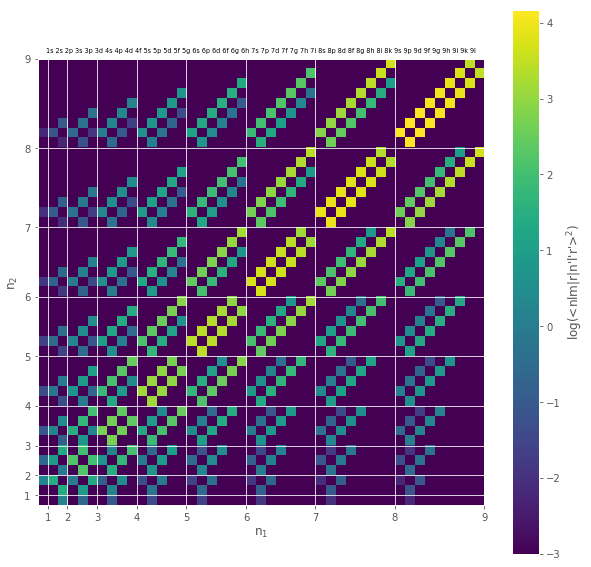

In [32]:
#  display <nl|r|n'l'>^2  ==> B
from src.Visual import Plotting

o1 = 0 ;  o2 = 13
fig = plt.figure(figsize=(10,10)) #, dpi=100)        
ax1 = fig.add_subplot(1,1,1 )
plt.imshow(np.log10(P.clip(min=1e-3)), origin='lower',extent=[o1,o2,o1,o2]) #,cmap="GnBu")# )
plt.colorbar(label="log(<nlm|r|n'l'r'>$^2$)")
#plt.title("<nlm|r|n'l'r'>^2")
plt.title(ca, fontsize=len(cnl)/7)
ax1.set_xlabel("n$_1$")
Plotting.set_imshow_ticks(ax1, np.arange(0,nn), axis='x',points=0,fmt='%4d')
ax1.set_ylabel("n$_2$")
Plotting.set_imshow_ticks(ax1, np.arange(0,nn), axis='y',points=0,fmt='%4d')
tt=np.array([1,1])
tcs = np.zeros(nmax-1)
t1=0
for i in range(1,nmax):
    t1 = t1+i
    tcs[i-1]=t1
tcs = tcs/nn*(o2-o1)
#    plt.plot([0,nn],t1*tt-0.5, color='white')
#    plt.plot(t1*tt-0.5,np.array([0,nn]), color='white')
ax1.set_xticks(tcs)
ax1.set_yticks(tcs)
ax1.set_xticklabels(np.arange(1, nmax+1, 1))
ax1.set_yticklabels(np.arange(1, nmax+1, 1))
ca

# move xtick to center

'1s 2s 2p 3s 3p 3d 4s 4p 4d 4f 5s 5p 5d 5f 5g 6s 6p 6d 6f 6g 6h 7s 7p 7d 7f 7g 7h 7i 8s 8p 8d 8f 8g 8h 8i 8k 9s 9p 9d 9f 9g 9h 9i 9k 9l'

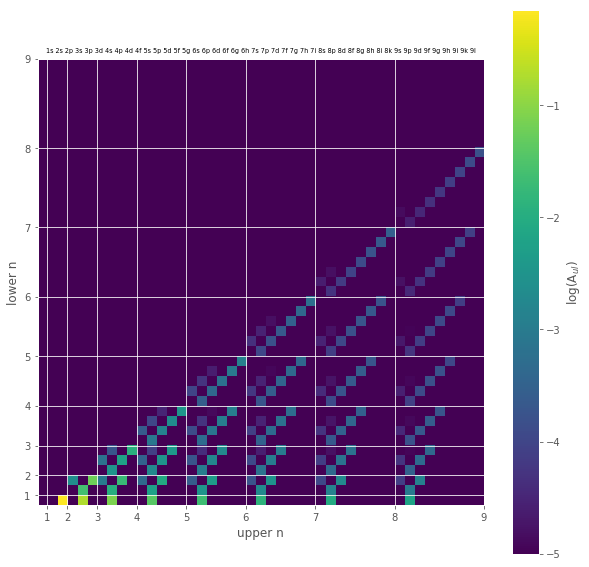

In [33]:
#  display A_ul,  <nl|r|n'l'>^2 * v^3 ==> A
from src.Visual import Plotting

fig = plt.figure(figsize=(10,10)) #, dpi=100)        
ax1 = fig.add_subplot(1,1,1 )
plt.imshow(np.log10(A.clip(min=1e-5)), origin='lower',extent=[o1,o2,o1,o2]) #,cmap="GnBu")# )
plt.colorbar(label="log(A$_{ul}$)")
plt.title(ca, fontsize=len(cnl)/7)
ax1.set_xlabel("upper n")
Plotting.set_imshow_ticks(ax1, np.arange(0,nn), axis='x',points=0,fmt='%4d')
ax1.set_ylabel("lower n")
Plotting.set_imshow_ticks(ax1, np.arange(0,nn), axis='y',points=0,fmt='%4d')
ax1.set_xticks(tcs)
ax1.set_yticks(tcs)
ax1.set_xticklabels(np.arange(1, nmax+1, 1))
ax1.set_yticklabels(np.arange(1, nmax+1, 1))
ca

### $A_{ul} \quad ( n_u \rightarrow n_l ) \quad$ $(l,m)$ について足し合せた結果

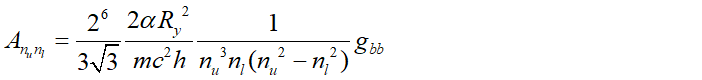
$\qquad$ Fujimoto 2004, "Plasma spectroscopy"

[Text(0,0,'1'),
 Text(0,0,'20'),
 Text(0,0,'40'),
 Text(0,0,'60'),
 Text(0,0,'80'),
 Text(0,0,'100')]

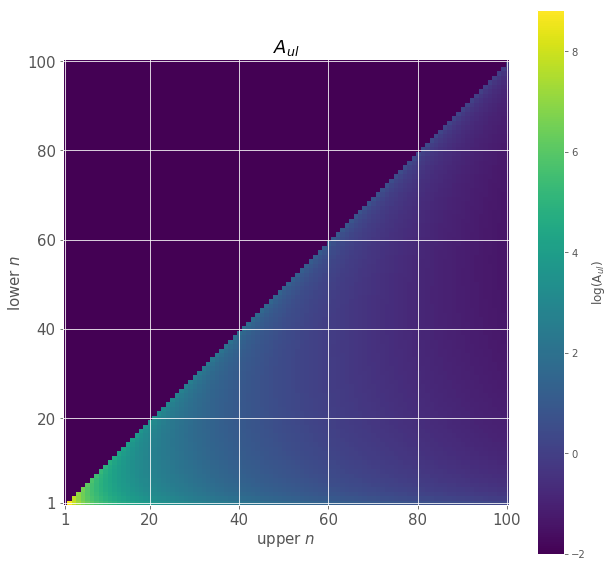

In [34]:
#  Hydrogen A(nu->nl)
#  2020.5.11  k.i.
nmax = 100
gbb = 1.   # 
ns = np.arange(1,nmax+1)  
Aul = np.zeros([nmax,nmax], dtype=float)
a = 2**6/3/np.sqrt(3) *2*Cst.alp_*Cst.E_Rydberg_**2 /Cst.me_/Cst.c_**2 / Cst.h_ *gbb
for nl in range(1,nmax+1):
    for nu in range(nl+1,nmax+1):
        nk = nu**3 *nl *(nu**2-nl**2)
        Aul[nl-1,nu-1] = a / nk

fig = plt.figure(figsize=(10,10)) #, dpi=100)        
ax = fig.add_subplot(1,1,1 )
plt.imshow(np.log10(Aul.clip(min=1e-2)), origin='lower')
plt.colorbar(label="log(A$_{ul}$)")
plt.title('$A_{ul}$', fontsize=18)
ax.set_xlabel("upper $n$", fontsize=15)
ax.set_ylabel("lower $n$", fontsize=15)
ticpos = np.linspace(0,nmax,6,dtype=int)-1 ; ticpos[0]=0
ticlab = ticpos+1  
ax.set_xticks(ticpos)
ax.set_xticklabels(ticlab, fontsize=15)
ax.set_yticks(ticpos)
ax.set_yticklabels(ticlab, fontsize=15)


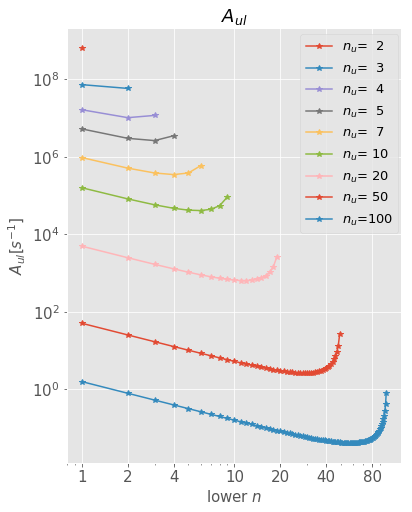

In [35]:
#  plot A_ul 
nlmax=100
nls = np.linspace(1,nlmax,nlmax) #,dtype=int)
nus = np.array([2,3,4,5,7,10,20,50,100],dtype=int)
nnl = len(nls)

fig = plt.figure(figsize=(6,8)) #, dpi=100)        
ax = fig.add_subplot(1,1,1 )
for nu in nus:
    ii = np.where(nls < nu)[0]
    nls1 = nls[ii]
    nk = nu**3 *nls1 *(nu**2-nls1**2)
    Aul1 = a/nk
    ax.plot(nls1,Aul1,"-*", label="$n_u$={0:3d}".format(nu))

plt.title('$A_{ul}$', fontsize=18)
plt.tick_params(labelsize=15)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("lower $n$", fontsize=15)
ax.set_ylabel("$A_{ul} [s^{-1}]$ ", fontsize=15)
#ticpos = np.linspace(0,nlmax,6,dtype=int) ; ticpos[0]=1
ticpos = [1,2,4,10,20,40,80]
ticlab = ticpos
ax.set_xticks(ticpos)
ax.set_xticklabels(ticlab, fontsize=15)
ax.legend(bbox_to_anchor=(1.01,1),fontsize=13,ncol=1)


# Connection of b-b & b-f transitions
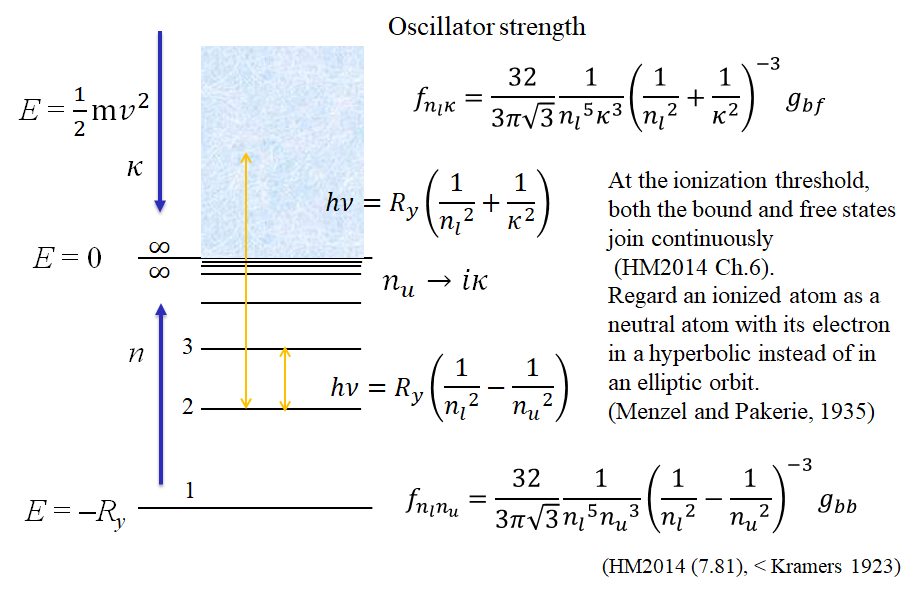

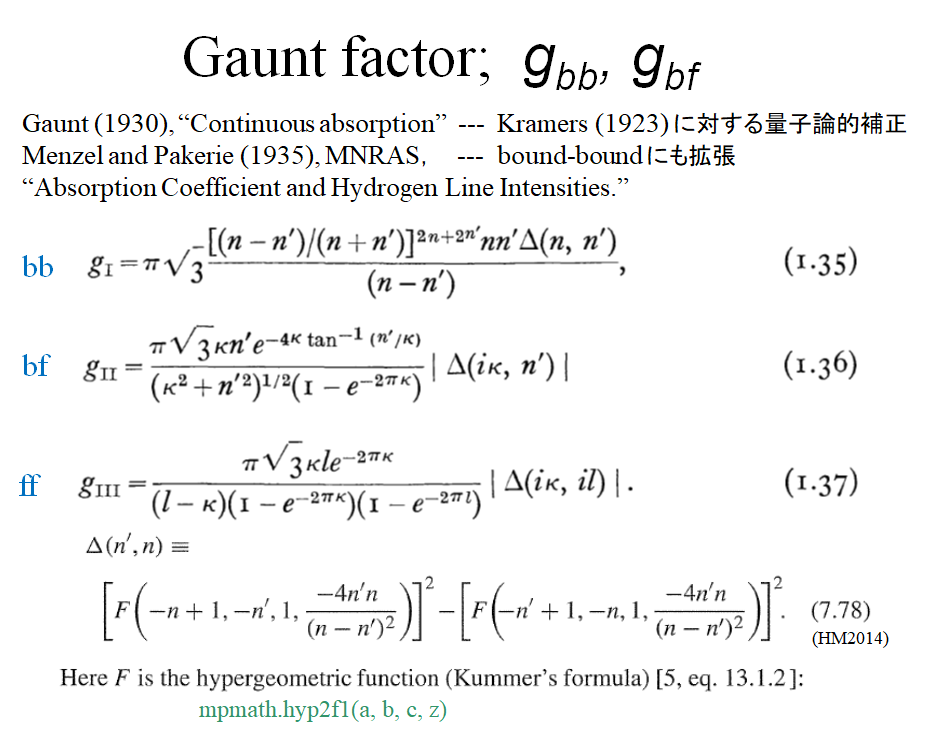

# Absorption cross sections,  水素様 b-b,  b-f  
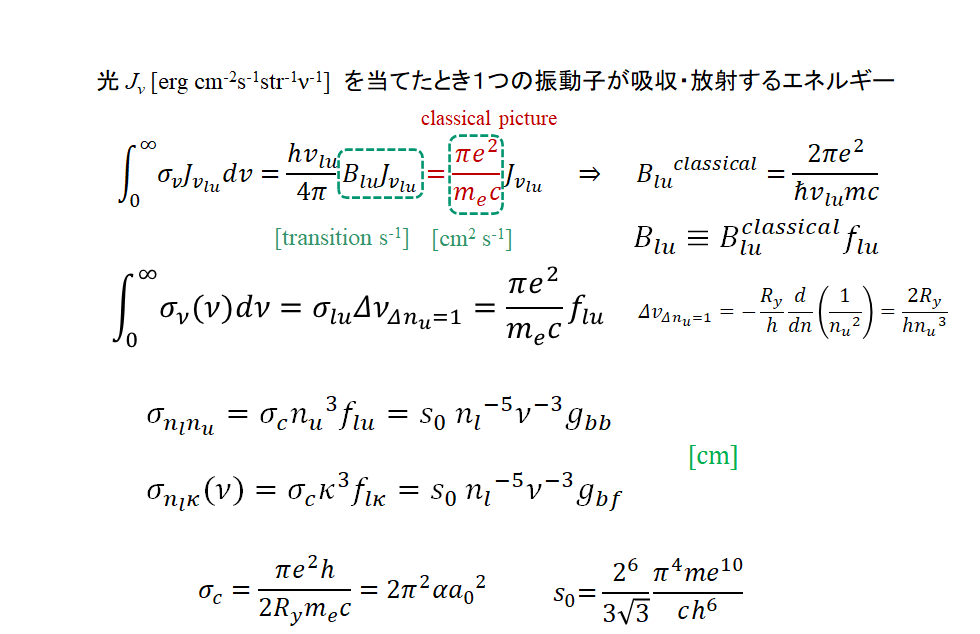

D:\Users\ichimoto\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


''

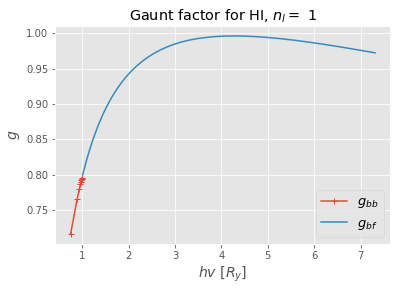

In [89]:
#  Gaunt factor,  Menzel and Pakerie 1935
#  2020.5.26  k.i.
from mpmath import *

def Dnn1(nl,nu):
    F1 = hyp2f1(-nu+1, -nl, 1, -4*nl*nu/(nu-nl)**2)
    F2 = hyp2f1(-nl+1, -nu, 1, -4*nl*nu/(nu-nl)**2)
    return F1**2 - F2**2

def Dnn(nl,nu):
    nnu = np.size(np.array(nu))
    if nnu > 1:
        DD = np.repeat(0j,nnu)
        for i in range(0,nnu):
            DD[i] = Dnn1(nl,nu[i])
        return DD
    return Dnn1(nl,nu)

def gbb(nl,nu):
    nume = np.pi*np.sqrt(3) * ((nu-nl)/(nu+nl))**(2*(nu+nl)) * nu*nl *Dnn(nl,nu)
    deno = nu - nl
    return nume/deno

def gbf(nl,k):
    nume = np.pi*np.sqrt(3) * nl * k * np.exp(-4* k * np.arctan(nl/k)) * np.abs(Dnn(nl,1j*k))
    deno = np.sqrt(k**2 + nl**2) * (1 - np.exp(-2*np.pi*k))
    return nume/deno
                                    
#-------------------------------------------------------------
nl = 1 
nmax = 10  ;  nus = np.linspace(2, nmax, nmax-1)
kmax = 10  ;  ks = np.logspace(-0.4, 1, 100)
hvl = (1/nl**2 - 1/nus**2)
hvc = (1/nl**2 + 1/ks**2)

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1 ) 
gbbs = gbb(nl,nus)
gbfs = gbf(nl,ks)
ax.plot(hvl,gbbs,"-+",label="$g_{bb}$")
ax.plot(hvc,gbfs,"-",label="$g_{bf}$")
ax.set_xlabel("$hv$ [$R_y$]",fontsize=14)
ax.set_ylabel("$g$",fontsize=14)
ax.set_title("Gaunt factor for HI, $n_l=${0:2d}".format(nl))
ax.legend(bbox_to_anchor=(1, 0),loc='lower right',fontsize=13,ncol=1)
;

D:\Users\ichimoto\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


''

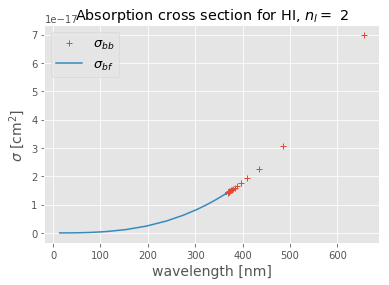

In [90]:
#  plot absorption cross section
nl = 2 
nmax = 20  ;  nus = np.linspace(nl+1, nmax, nmax-nl)
kmax = 10  ;  ks = np.logspace(-0.4, 10, 100)
vl = (1/nl**2 - 1/nus**2) * Cst.E_Rydberg_/Cst.h_ ; wll = Cst.c_/vl *1e7  #  nm
vc = (1/nl**2 + 1/ks**2)  * Cst.E_Rydberg_/Cst.h_ ; wlc = Cst.c_/vc *1e7
s0 = 2**6/3/np.sqrt(3) * np.pi**4 * Cst.me_ * Cst.e_**10 / Cst.c_ /Cst.h_**6  

sbb = s0 * gbb(nl,nus) /nl**5 /vl**3
sbf = s0 * gbf(nl,ks) /nl**5 /vc**3

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1 ) 
ax.plot(wll,sbb,"+",label="$\sigma_{bb}$")
ax.plot(wlc,sbf,"-",label="$\sigma_{bf}$")
ax.set_xlabel("wavelength [nm]",fontsize=14)
ax.set_ylabel("$\sigma$ [cm$^2$]",fontsize=14)
ax.set_title("Absorption cross section for HI, $n_l=${0:2d}".format(nl))
ax.legend(bbox_to_anchor=(0, 1),loc='upper left',fontsize=13,ncol=1)
;

# Photoionization & Recombination cross section

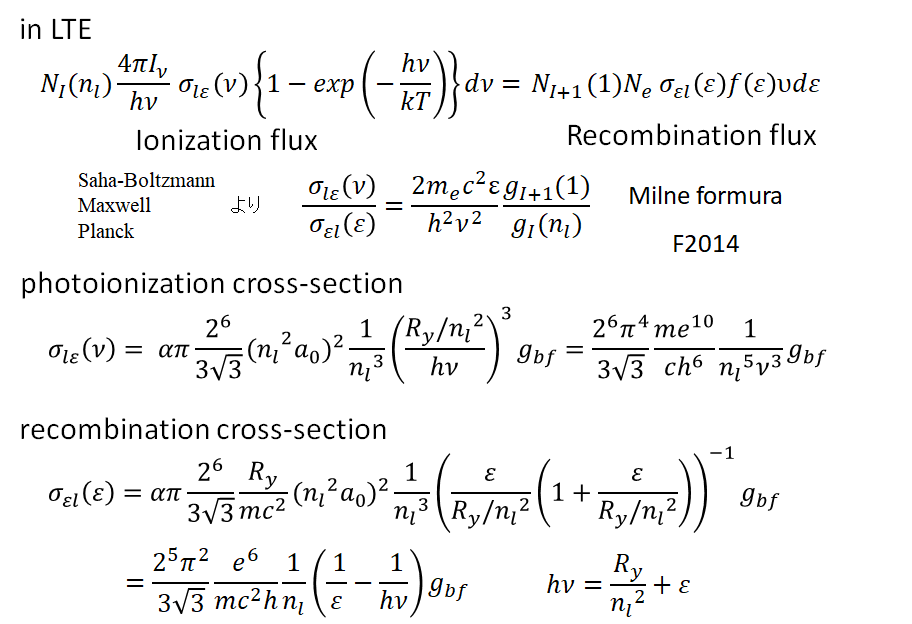

''

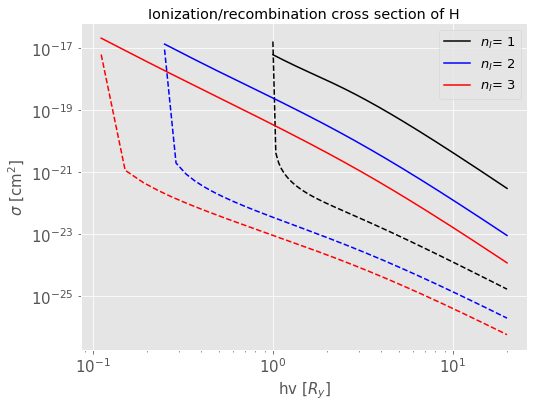

In [91]:
# photoionization/recombination cross-section
from src import Constants as Cst

Ry = Cst.E_Rydberg_
a0 = Cst.a0_
cols=['black','blue','red','green','orange','purple','gray']

cnst0 = Cst.alp_*np.pi*2**6/3/np.sqrt(3)
cnsti = 2**6*np.pi**4/3/np.sqrt(3) *Cst.me_*Cst.e_**10/Cst.c_/Cst.h_**3
cnstr = 2**5*np.pi**2/3/np.sqrt(3) *Cst.e_**6/Cst.me_/Cst.c_**2/Cst.h_
nls = [1,2,3]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1 ) 
for nl in nls:
    hvmin = 1./nl**2 + 0.00001
    hvr = np.linspace(hvmin, 20, 500)   #  hv in unit oh Ry
    k = 1/(hvr - 1/nl**2)
    #sle = cnsti /nl**5 /(hvr*Ry)**3 *gbf(nl,k)
    sle = cnst0 *(nl**2*a0)**2 /nl**3 * (1/nl**2 /hvr)**3 *gbf(nl,k)
    eps = hvr - 1/nl**2
    sel = cnst0 *Ry/Cst.me_/Cst.c_**2 *(nl**2*a0)**2 /nl**3 / (eps*nl**2 *(1+eps*nl**2)) *gbf(nl,k)
    ax.plot(hvr, sle, color=cols[nl-1], label="$n_l$={0:2d}".format(nl))
    ax.plot(hvr, sel, "--", color=cols[nl-1]) #,label="$n_l$={0:2d}".format(nl))
    
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("hv [$R_y$]",fontsize=15)
ax.set_ylabel("$\sigma$ [cm$^2$]",fontsize=15)
plt.tick_params(labelsize=15)
ax.set_title("Ionization/recombination cross section of H")
ax.legend(bbox_to_anchor=(1, 1),loc='upper right',fontsize=13,ncol=1)
;

--- recombination        　$h\nu - R_y/n_l^2 = \epsilon \rightarrow 0 \quad$  のとき $ \quad\sigma \rightarrow oo$

# スペクトル線の微細構造（Fine structures）

電子のスピン（$\bf{s}$）に付随する磁気モーメントが、軌道運動（$\bf{l}$）によって電子が感じる磁場と相互作用すること、および相対論効果によって、全角運動量（$\bf{j}$=$\bf{l}$+$\bf{s}$）の異なるエネルギーレベルが分裂する。水素様原子（中心力場）ではその大きさは僅かであるが、一般には線が完全に分離し、それぞれを「ライン」という。

量子数；

$\quad n = 1, 2, 3\dots,   \quad l = 0, 1,\dots n-1,   \quad m = -l,\dots 0,\dots l,  \quad s = 1/2, \quad j = l \pm s$

選択則(dipole transition)；

$\quad \Delta l = \pm 1, \quad \Delta s = 0, \quad \Delta j = 0,\pm1$

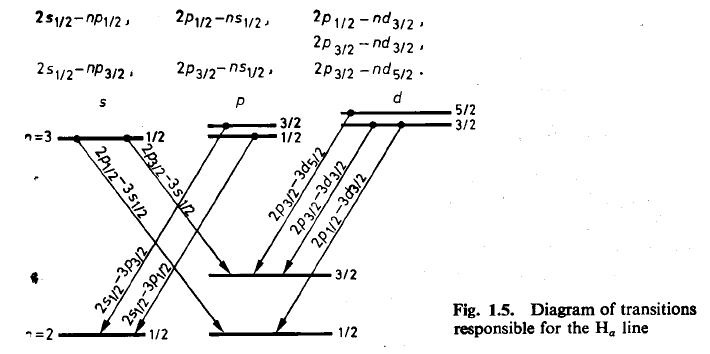

Sobelman 1979, “Atomic Spectra and Radiative Transition”

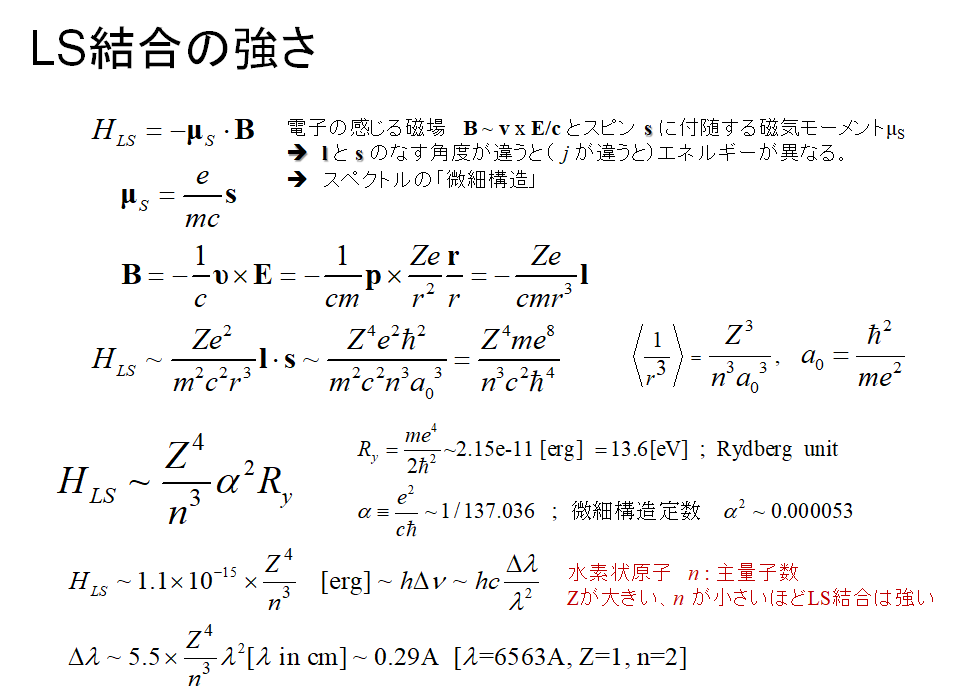

正しくは、(Sobelman 1979)
# $\Delta E_{nj} = \frac{Z^4}{n^3}\left( \frac{3}{4n} - \frac{1}{j-1/2}\right)\alpha^2 R_y$

$\qquad  \alpha = \frac{e^2}{ch} \sim 1/137 \qquad - \qquad 微細構造定数$


In [17]:
#  Hydrogen-like atom, calculate fine structure 
#	relativistic electron mass and l-s coupling
#	from Sobelman book
#	2005.7.24	k.i.
#-----------------------------------------------------------------------
def dElevel(n,j,Z=1):
    alp2 = Cst.alp_**2  # fin structure const.^2
    dE = alp2*(3./4./n - 1./(j+0.5))*Z**4/(n**3)*Cst.E_Rydberg_
    return dE

#-----------------------------------------------------------------------
def clev(n,l,j):
    cL = ['s','p','d','f','g','h','i','k','l','m','n','o','q',
          'r','t','u','v','w','x','y','z','a','b','c','e','sa','pa']
    com = "{0:1d}".format(n)+cL[l]+"{0:3.1f}".format(j)
    return com


In [18]:
#-----------------------------------------------------------------------
Z=1
nl = 2  # 1-Lyman,  2-Balmer,  3-Paschen,  4-Blackett
nu = 3

RZ = Z**2*Cst.E_Rydberg_
El0 = -RZ/nl**2
Eu0 = -RZ/nu**2
wl0 = Cst.c_/((Eu0-El0)/Cst.h_)*1e8  # wl in A
com = "nl={0:2d}".format(nl)+"  nu={0:2d}".format(nu)+"  Z={0:1d}".format(Z)
print(com+"   wl0={0:10.3f}".format(wl0)+"A")

ss = np.array([-1,1])*1./2.
count = 0

for ll in range(0,nl):
    for s1 in [-0.5,0.5]:
        jl = ll+s1
        if jl >= 0: 
            dEl = dElevel(nl,jl,Z)
            El = El0+dEl
            for dl in [-1,1]: # dl=+/-1
                lu = ll+dl
                for s2 in [-0.5,0.5]:
                    ju = lu+s2
                    #print("lu=",lu,", ju=",ju)
                    if ju >= 0 and np.abs(ju-jl) <= 1:
                        dEu = dElevel(nu,ju,Z)
                        Eu = Eu0+dEu
                        wl = Cst.c_/((Eu-El)/Cst.h_)*1e8
                        #print(clev(nl,ll,jl)+' - '+clev(nu,lu,ju)+"{0:10.3f}".format(wl)
                        #    +"   {0:10.5f}".format(wl-wl0))
                        if count == 0:
                            wls = [wl]
                            lowers = [clev(nl,ll,jl)] ;  gls = [2*jl+1]
                            uppers = [clev(nu,lu,ju)] ;  gus = [2*ju+1]
                        else:
                            wls.append(wl)
                            lowers.append(clev(nl,ll,jl)) ;  gls.append(2*jl+1)
                            uppers.append(clev(nu,lu,ju)) ;  gus.append(2*ju+1)
                        count=count+1

wls = np.array(wls)
lowers = np.array(lowers) ;  gls = np.array(gls)
uppers = np.array(uppers) ;  gus = np.array(gus)
ii = np.argsort(wls)
wls = wls[ii]
lowers = lowers[ii] ; gls=gls[ii]
uppers = uppers[ii] ; gus=gus[ii]

nt = len(wls)

#--  A-coeff from http://physics.nist.gov/cgi-bin/ASD/lines1.pl  ---
As = np.repeat(1,nt)
if nl == 2 and nu == 3: #  Ha
    As = np.array([2.2448e7, 5.3877e7, 2.1046e6, 2.2449e7, 6.4651e7, 1.0775e7, 4.2097e6 ])
if nl == 2 and nu == 4: #  Hb
    As = np.array([9.6680e6, 1.7188e7, 8.5941e5, 9.6683e6, 2.0625e7, 3.4375e6, 1.7190e6 ])

print("upper   lower    wl         dwl        A")
for i in range(0,nt):
    print(uppers[i]+" - "+lowers[i]+"{0:10.3f}  {1:7.3f}  {2:10.3e}".format(wls[i],wls[i]-wl0,As[i]))
print("                       A(total) = {0:10.3e}".format(np.sum(As))) # (gus/gls*As)


nl= 2  nu= 3  Z=1   wl0=  6561.116A
upper   lower    wl         dwl        A
3p1.5 - 2s0.5  6560.943   -0.173   2.245e+07
3d1.5 - 2p0.5  6560.943   -0.173   5.388e+07
3p0.5 - 2s0.5  6560.990   -0.127   2.105e+06
3s0.5 - 2p0.5  6560.990   -0.127   2.245e+07
3d2.5 - 2p1.5  6561.085   -0.032   6.465e+07
3d1.5 - 2p1.5  6561.100   -0.016   1.078e+07
3s0.5 - 2p1.5  6561.147    0.031   4.210e+06
                       A(total) =  1.805e+08


Text(0,0.5,'A')

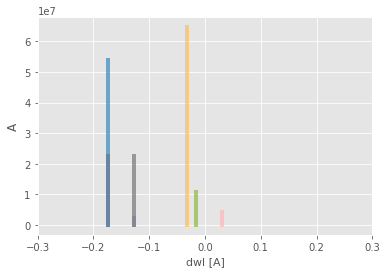

In [23]:
#  plot fine structures
fig = plt.figure(figsize=(6,4)) 
ax = fig.add_subplot(1,1,1 ) # nx,ny, #
for i in range(0,nt):
    x = (wls[i]-wl0)*np.array([1,1])
    y = As[i]*np.array([0,1])
    ax.plot(x,y,alpha=0.7,linewidth=4) #,label=f"{j} ")
ax.set_xlim(-0.3,0.3)
ax.set_xlabel("dwl [A]",fontsize=11)
ax.set_ylabel("A")


Maxwell distribution

$f(\Delta\lambda)=\exp\left(-\frac{\Delta \lambda^2}{\Delta \lambda_D^2}\right), \qquad
 \Delta \lambda_D = \frac{\lambda_0}{c}\sqrt{\frac{k_BT}{m}}$

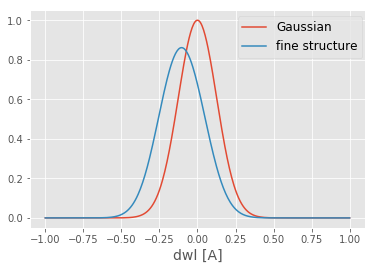

In [24]:
#--  plot profile
T = 8000. # [K]
dw = np.linspace(-1,1,401)  # A
dwd = wl0/Cst.c_*np.sqrt(Cst.k_*T/Cst.mH_)
nl=len(dw)

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1 ) 
f = np.exp(-(dw/dwd)**2)
ax.plot(dw,f,label="Gaussian")
ax.set_xlabel("dwl [A]",fontsize=14)
Atot = np.sum(As)
fb = np.zeros(nl)
for i in  range(0,nt):
    fb = fb + As[i]/Atot *np.exp(-((dw-wls[i]+wl0)/dwd)**2)
ax.plot(dw,fb,label="fine structure")
ax.legend(bbox_to_anchor=(1.01,1),fontsize=12,ncol=1)


# ---------------------------------------------------------------
 
 
  
 
 
# ------------------------  obsolate  -------------------------

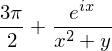

In [113]:
x = Symbol('x')
y = Symbol('y')
a, b =  symbols("a b")
Rational(3 ,2)*pi + exp(I*x) / (x**2 + y)

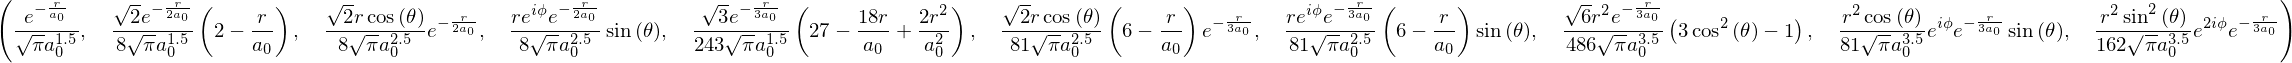

In [9]:
a0 = Symbol('a_0', real=True)
r = Symbol('r', real=True)
theta = Symbol('theta', real=True)
phi = Symbol('phi',real=True)

wf_100 = Symbol('\psi_{100}')
#a0=1
psi_100 = 1/sqrt(2*pi) * 1/sqrt(2) * 2/a0**(3/2)*exp(-r/a0)
psi_200 = 1/sqrt(2*pi) * 1/sqrt(2) * 1/(2*sqrt(2)*a0**(3/2)) *(2 - r/a0)*exp(-r/(2*a0))
psi_210 = 1/sqrt(2*pi) * sqrt(6)/2 *cos(theta) * 1/(2*sqrt(6)*a0**(3/2)) *r/a0 *exp(-r/(2*a0))
psi_211 = 1/sqrt(2*pi)*exp(I*phi) * sqrt(3)/2 *sin(theta)* 1/(2*sqrt(6) * a0**(3/2)) *r/a0 *exp(-r/(2*a0))
psi_300 = 1/sqrt(2*pi) * 1/sqrt(2) * 2/(81*sqrt(3)*a0**(3/2)) *(27 - 18*r/a0 + 2*(r/a0)**2)*exp(-r/(3*a0))
psi_310 = 1/sqrt(2*pi) * sqrt(6)/2 *cos(theta) * 4/(81*sqrt(6)*a0**(3/2)) *(6 - r/a0) *r/a0 *exp(-r/(3*a0))
psi_311 = 1/sqrt(2*pi)*exp(I*phi) * sqrt(3)/2 *sin(theta) * 4/(81*sqrt(6)*a0**(3/2)) *(6 - r/a0)*r/a0 *exp(-r/(3*a0))
psi_320 = 1/sqrt(2*pi) * sqrt(10)/4 *(3*cos(theta)**2-1) * 4/(81*sqrt(30)*a0**(3/2)) *(r/a0)**2 *exp(-r/(3*a0))
psi_321 = 1/sqrt(2*pi)*exp(I*phi) * sqrt(15)/2 *sin(theta)*cos(theta) * 4/(81*sqrt(30)*a0**(3/2)) *(r/a0)**2 *exp(-r/(3*a0))
psi_322 = 1/sqrt(2*pi)*exp(2*I*phi) * sqrt(15)/4 *sin(theta)**2 * 4/(81*sqrt(30)*a0**(3/2)) *(r/a0)**2 *exp(-r/(3*a0))
#print(psi_210)
psi_100, psi_200, psi_210, psi_211, psi_300, psi_310, psi_311, psi_320, psi_321, psi_322

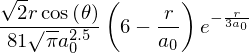

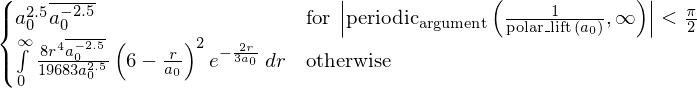

In [10]:
#  confirm normalization
psi=psi_310
display(psi)
#integrate(psi*conjugate(psi) *r**2 *sin(theta),(phi,0,2*pi),(theta,0,pi), (r,0,oo))
integrate(psi_310*conjugate(psi_310) *r**2 *sin(theta),(phi,0,2*pi),(theta,0,pi), (r,0,oo))

In [90]:
#--------------------------------------------------------------------------
# hydrogen wavefunction
#  ref. Einführung in die Theoretische Chemie Prof. Dr. Bettina G. Keller, Luca Donati, Oliver Lemke
#--------------------------------------------------------------------------
from scipy.special import genlaguerre
from scipy.special import lpmv
from scipy.integrate import simps

#--------------------------------------------------------------------------
def factorial(n):
    fact = 1
    for i in range(1, n + 1):
        fact *= i
    return fact

#--------------------------------------------------------------------------
def Rf(n,l,r):
    # Returns the radial wavefunction of hydrogen 
    #  n -  principle quantum number a
    #  l -  angular momentum quantum number.
    #  r[*] - radial distance in unit of Borh radius
    a0= 1.  # Borh radius
    Z = 1.  # nuclear charge
    ro = 2.*Z*r/(n*a0)
    Leg = genlaguerre(n-l-1,2*l+1)(2.*r/n/a0)
    fct =np.sqrt((2./(n*a0))**3 *float(factorial(n-l-1))/2./n/float(factorial(n+1))) 
    yr = np.exp(-ro/2)* ro**l * Leg *fct
    ss = np.sum(yr**2 *r**2)*(r[1]-r[0])
    yr=yr/np.sqrt(ss)
    
    return yr

#--------------------------------------------------------------------------
def Yf(l,m,theta,phi):
    # Returns the angular wavefunction of hydrogen 
    #  l -  angular momentum quantum number.
    #  m -  magnetic quantum number.
    #  theta[*], phi[*] - angle coordinate
    Plm = lpmv(m,l,np.cos( theta ))
    ylm = (-1)**m * np.sqrt((2.*l + 1)* factorial(l-m)/4./np.pi/factorial(l + m)) * Plm 

    return ylm
